In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos Dados

In [2]:
df_pontuacao = pd.read_csv('./datasets/1700665983594-attachment.csv')

In [ ]:
# Visualizar o topo
df_pontuacao.head(5)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [4]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


### EDA 

In [6]:
# Medidas estatisticas das varaiveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

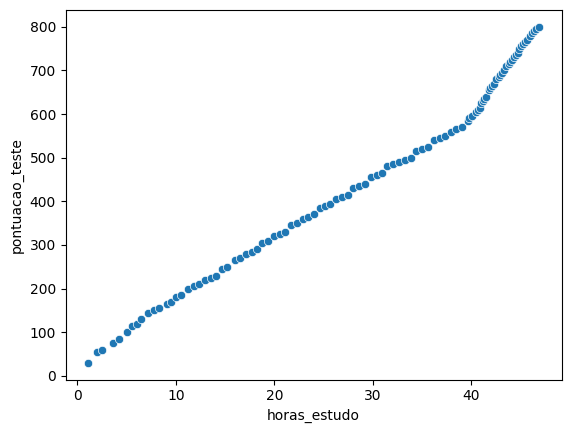

In [8]:
# PLot de disperção
# X = horas_estudos
# y = pontuacao_teste

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')


<Axes: ylabel='horas_estudo'>

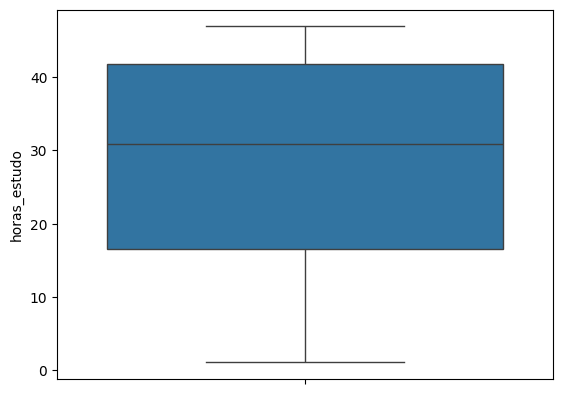

In [9]:
# Verificar se temos outlies
#plot Boxplot

sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

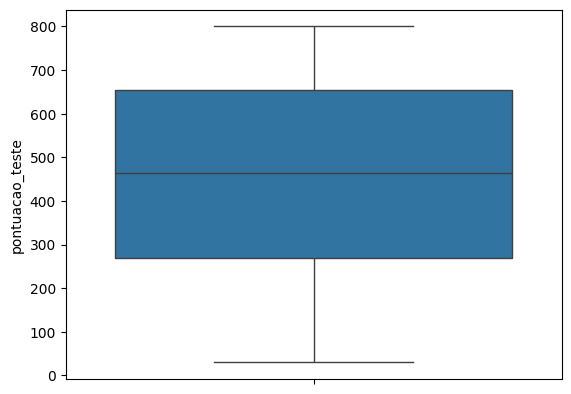

In [10]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')


<Axes: >

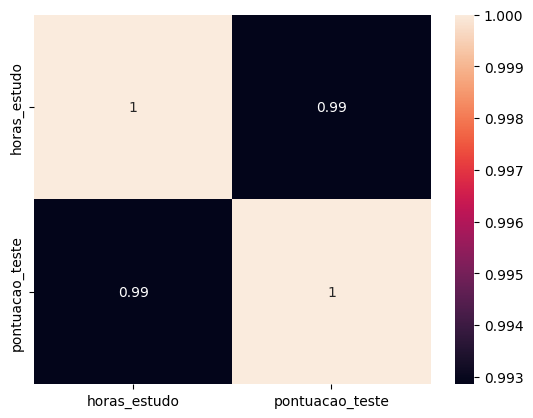

In [ ]:
# Verificar a correlação
#usando heatmap e pearson

sns.heatmap(df_pontuacao.corr('pearson'), annot=True, )

<Axes: >

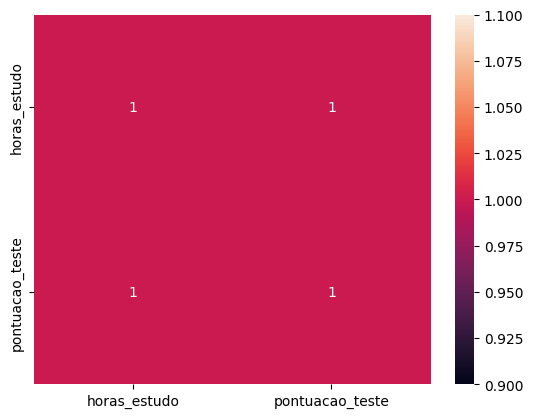

In [ ]:
#usando spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True, )


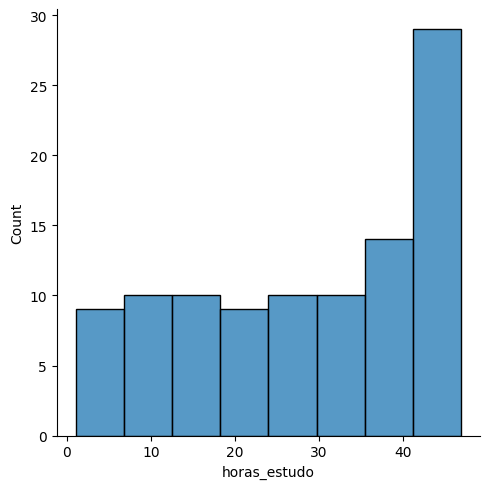

In [14]:
# Histrograma das variaveis 
sns.displot(df_pontuacao, x='horas_estudo')

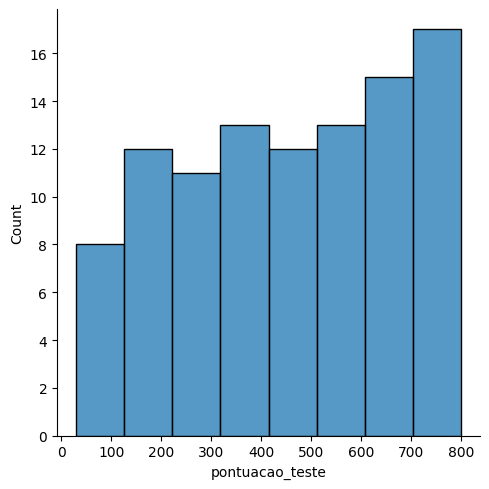

In [15]:
sns.displot(df_pontuacao, x='pontuacao_teste')


### Treinar o modelo

In [25]:
# Dividir dataset entre treino e teste
# quando temos apenas uma feature, precisamos ajustar o shape

X = df_pontuacao[['horas_estudo']].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=50)

In [26]:
# Instancia o modelo a ser treinado

reg_model = LinearRegression()

In [27]:
# Treinar o modelo

reg_model.fit(X_train,y_train)

LinearRegression()

In [28]:
# imprimir a esquação da reta
# y = aX + b
print("a equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

a equação da reta é y = 15.700193x + 9.096644


c:\Users\dccas\.virtualenvs\Regressao_linear_simples-FDRXky0A\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


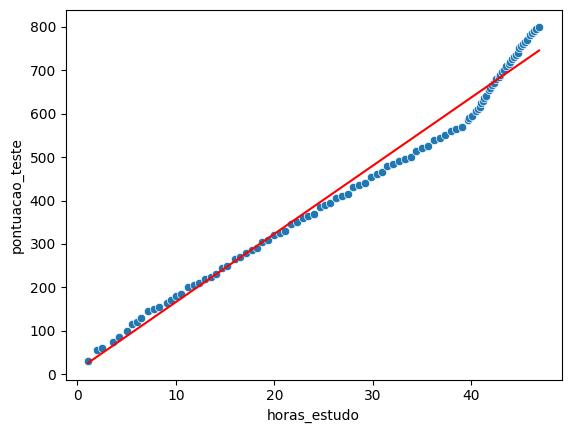

In [29]:
sns.scatterplot(data = df_pontuacao, x='horas_estudo', y = 'pontuacao_teste')
plt.plot(df_pontuacao['horas_estudo'], reg_model.predict(df_pontuacao[['horas_estudo']]), color='red')

### Validar Modelo - Metricas

In [31]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_model.predict(X_test)

In [32]:
# Calcular metrica R-squared ou Coeficiente de Determição
# 0 a 1 objetivo ficar mais perto do 1
#R2 representa a proporção na variação na variavel dependente que é explicada pela variavel independente
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [33]:
r2_score(y_test,y_pred)

0.9845235193762372

In [34]:
# Calcular metrica MAE mean absolute error
# MAE = media (y_test - y_pred)
# É uma metrica facil de interpetar, MAE é menos sensivel a outliers
mean_absolute_error(y_test, y_pred)


21.92371942920817

In [35]:
# Calcular metrica MSE (mean squared error)
#MSE = media (y_test - y_pred)^2
#nao é uma metrica facil de interpretar
# é uma metrica mais sensivel a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

713.9116918498124

In [37]:
# evitar error do mean_squared_error com squared false
from sklearn.metrics import root_mean_squared_error

In [38]:
#Calcular metrica RMSE (square root mean squared error)
#RMSE = media  (raiz (y_test - y_pred)^2)
#É uma metrica mais facil de interpretar
# mas ainda sim continua mais sensivel aos outliers
root_mean_squared_error(y_test,y_pred)


26.71912595594797

<function matplotlib.pyplot.show(close=None, block=None)>

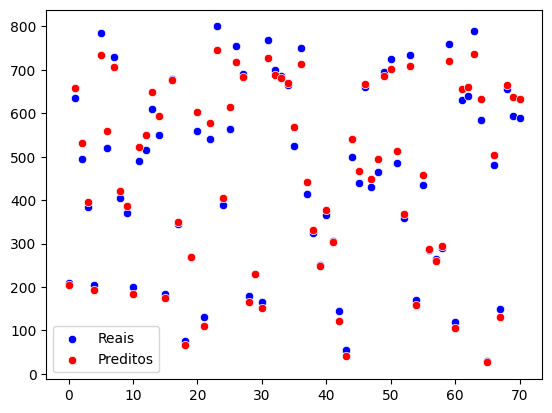

In [40]:
# Analise grafica
x_axis = range(len(y_test))
plt.Figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Reais')

sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Preditos')

plt.legend()
plt.show



### Analise de residuos

In [42]:
# Calcular residuos
residuos = y_test - y_pred

In [43]:
# Calcular os residuoes padronizados (Standardization)
#Para cada elemento de um conjunto (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

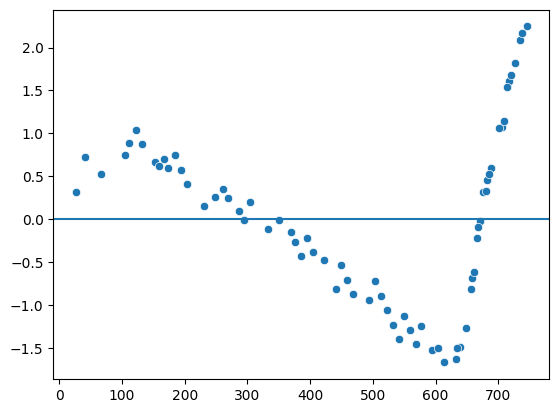

In [45]:
# Verificar Linearidade do modelo:  
# se os residuos estiver entre -2 e 2 (na escala padrao) - indica linearidade
#verificar homogeneidade das variancias (Homocedasticidade)
#Valores estiver em torno da reta temos homocedasticidade, caso contrario se tivermos alguma tendencia ou padrao (formam um cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

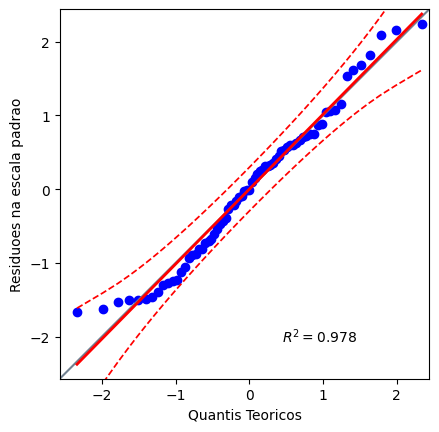

In [46]:
# Checar se residuos seguem uma distribuição normal
#QQ (quantile-quatile) plot que avalia se uma amostra segue uma distribuição normal
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Residuoes na escala padrao')
plt.show()

In [48]:
# teste de normalidade - Shapiro Wilk
# H0 segue distribuição normal
# H1 nao segue uma distribuição
# se o p-valor > 0.05 nao rejeita H0, caso contrario rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print(stat_shapiro,p_valor_shapiro)


0.9704868318029239 0.09270309689103534


In [49]:
# teste de normalidade - Kolmogorov-Smirnov
# H0 segue distribuição normal
# H1 nao segue uma distribuição
# se o p-valor > 0.05 nao rejeita H0, caso contrario rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print(stat_ks,p_valor_ks)


0.5070414230316801 1.9390838405655857e-17


### Fazer predições com o modelo

In [56]:
# se eu estudar estudar 30.4 horas , qual pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[486.38249947]])

In [58]:
# se eu quiser tirar 600 horas quantas hroas eu preciso estudar
# y = ax + b
# y -b = ax
# (y-b) / a = x

(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.636694697272404)

In [59]:
reg_model.predict([[37.63]])


array([[599.89489196]])

### Salvar modelo para usar depois

In [60]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']

### Salvando modelo e entregando via API